# week 5
## convolutional neural networks CNN
### part 3: visualize the learned filters and feature maps learned by the CNN

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [5]:
# Step 1: Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0 # Normalize pixel values
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
# Step 2: Define a basic CNN model
def build_cnn():
    model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1),
    name="conv1"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu", name="conv2"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",

    metrics=["accuracy"])
    return model

In [7]:
# Step 3: Train and evaluate the CNN
cnn_model = build_cnn()
history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1290 - accuracy: 0.9606 - val_loss: 0.0513 - val_accuracy: 0.9829
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0412 - accuracy: 0.9871 - val_loss: 0.0314 - val_accuracy: 0.9905
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0287 - accuracy: 0.9908 - val_loss: 0.0281 - val_accuracy: 0.9909
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0206 - accuracy: 0.9935 - val_loss: 0.0285 - val_accuracy: 0.9908
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0155 - accuracy: 0.9951 - val_loss: 0.0246 - val_accuracy: 0.9918
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0116 - accuracy: 0.9967 - val_loss: 0.0270 - val_accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0095 - accuracy: 0.9970 - val_loss: 0.0359 - val_accur

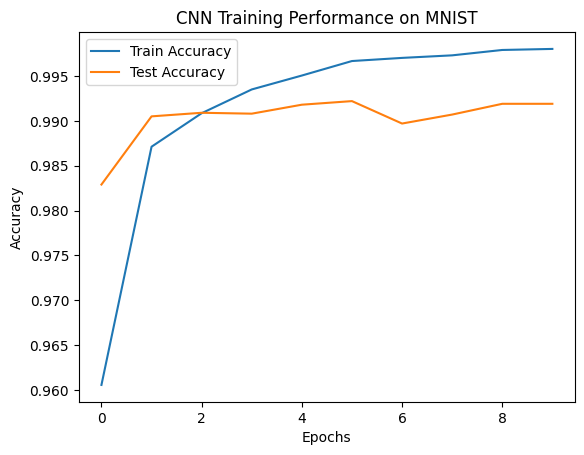

In [8]:
# Step 4: Plot training history
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("CNN Training Performance on MNIST")
plt.legend()
plt.show()

In [9]:
# Step 5: Evaluate the final model
final_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)[1] * 100
print(f"Final Test Accuracy: {final_accuracy:.2f}%")

Final Test Accuracy: 99.19%


1/1 [==============================] - 0s 14ms/step


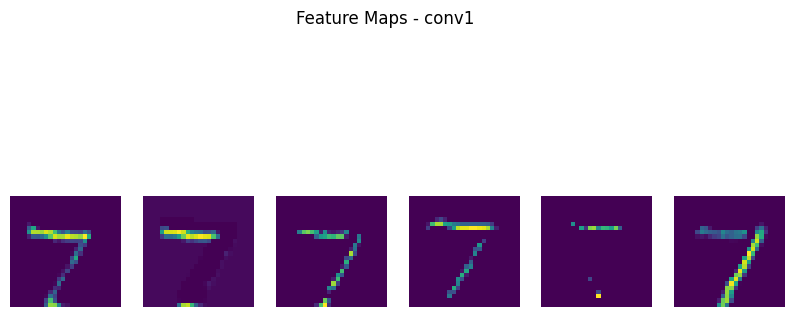

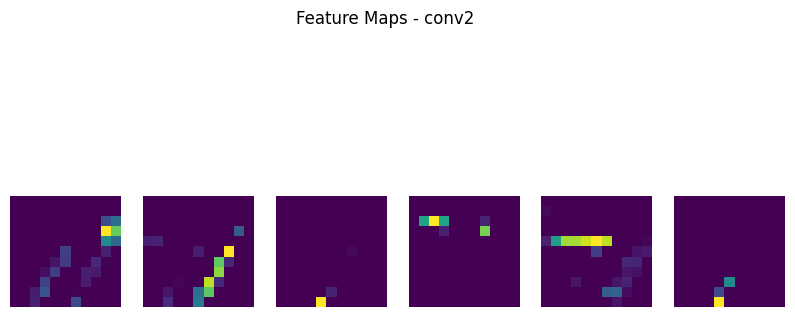

In [10]:
# Step 6: Visualize filters and feature maps
# Ensure the model has been called at least once
_ = cnn_model.predict(np.expand_dims(X_test[0], axis=0))

# Extract outputs of convolutional layers
layer_outputs = [layer.output for layer in cnn_model.layers if "conv" in layer.name]
activation_model = tf.keras.models.Model(inputs=cnn_model.input, outputs=layer_outputs)

# Select a sample image
sample_image = np.expand_dims(X_test[0], axis=0)
feature_maps = activation_model.predict(sample_image)

for layer_name, feature_map in zip([layer.name for layer in cnn_model.layers if "conv" in layer.name], feature_maps):
    plt.figure(figsize=(10, 5))
    num_filters = feature_map.shape[-1]
    for i in range(min(num_filters, 6)): # Visualizing first 6 feature maps
        plt.subplot(1, 6, i + 1)
        plt.imshow(feature_map[0, :, :, i], cmap="viridis")
        plt.axis("off")
    plt.suptitle(f"Feature Maps - {layer_name}")
    plt.show()

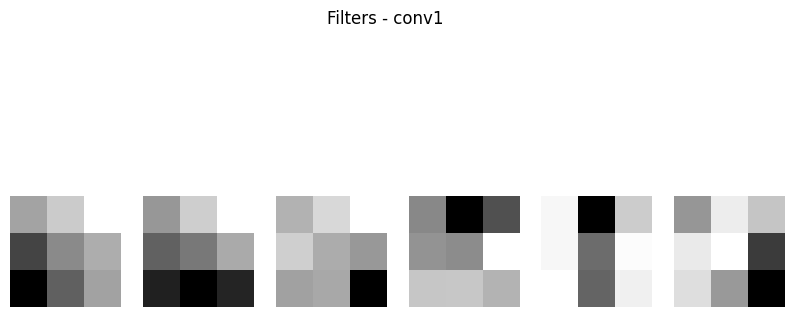

In [11]:
# Step 7: Visualize the filters (kernels) of the first Conv layer
def visualize_filters(layer_name):
    layer = cnn_model.get_layer(name=layer_name)
    filters, biases = layer.get_weights()

    num_filters = filters.shape[-1] # Number of filters
    num_channels = filters.shape[-2] # Number of input channels (should be 1 for grayscale)

    plt.figure(figsize=(10, 5))
    for i in range(min(num_filters, 6)): # Display first 6 filters
        plt.subplot(1, 6, i + 1)
        plt.imshow(filters[:, :, 0, i], cmap="gray")
        plt.axis("off")
    plt.suptitle(f"Filters - {layer_name}")
    plt.show()

visualize_filters("conv1") # Visualize the filters of the first Conv layer